In [1]:
from gensim import models

file_f = open('D:/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/fakta_final.txt').read()
file_h = open('D:/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/hoax_final.txt').read()

list_f = file_f.split()
list_h = file_h.split()

sentence = models.doc2vec.LabeledSentence(
    words=list_f, tags=["SENT_fakta"])
sentence1 = models.doc2vec.LabeledSentence(
    words=list_h, tags=["SENT_hoax"])

sentences = [sentence, sentence1]
token_count = sum([len(sentence) for sentence in sentences])

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
            
model = models.Doc2Vec(dm=0, alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)


for epoch in range(10):
    model.train( sentences, total_examples = token_count, epochs = model.iter)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay
   

model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')


#print(model.docvecs.most_similar(["SENT_hoax"])[0][1])
#print(model.docvecs.most_similar(["SENT_fakta"]))
#print(model_loaded.docvecs.most_similar(["SENT_hoax"]))
print(model.docvecs["SENT_hoax"])

#word_vec = model['pesan']
#model.docvecs.most_similar([word_vec])
#print("fakta")
#print(model.docvecs["SENT_fakta"])


C:\Users\Ajeng\Anaconda2\lib\site-packages\gensim-2.0.0-py2.7-win-amd64.egg\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[ 0.01577158 -0.33403736 -0.74644154 -0.05018593 -0.29500923  0.10051078
  0.59066093  0.15999183  0.60500681 -0.27592629  0.5865199   0.85014433
  0.64447063 -0.01910199 -0.70880985  0.81311417  0.6711719   0.20234178
  0.14917235 -0.46753821 -0.47410557  0.82025355 -0.02705028 -0.32966086
 -0.18507069 -0.39205042 -0.07406677 -0.00585387 -0.44559646 -0.02353149
 -0.71554071 -0.01059906 -0.35512319 -0.77378678 -0.21844511  0.96850908
  0.61363465 -0.03183681  0.59124303 -0.14200468 -0.31687638 -0.18800615
  0.69615901 -0.601439    0.00977205 -0.18855964  0.57788217 -0.61103529
 -0.08935108  0.18029065 -0.09630859  0.21262227 -0.71580756 -0.60509038
  0.17278685 -0.48288006 -0.03802231  0.88890225 -0.01812067 -0.30979604
 -0.14569169  0.92810553 -0.90907478 -0.13967089  0.20922379  0.50536066
  0.24322703 -0.55951679  0.23453188  0.24891908  0.14586844  0.52829838
  0.65181625  0.18107687 -0.45864609 -0.03988267 -0.37037107  0.01921043
  0.21706629  0.22742169  0.36084199  0.29469028  0

In [2]:
import numpy as np
new_mat = np.vstack((model.docvecs["SENT_hoax"], model.docvecs["SENT_fakta"]))
np.shape(new_mat)

(2L, 100L)

In [3]:
from sklearn.preprocessing import StandardScaler
x_new = StandardScaler().fit_transform(new_mat)


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
new_pca = pca.transform(x_new)
print("original shape:   ", new_mat.shape)
print("transformed shape:", new_pca.shape)

x = np.stack((new_pca[0][0], new_pca[1][0]))
y = np.stack((new_pca[0][1], new_pca[1][1]))
x
y

('original shape:   ', (2L, 100L))
('transformed shape:', (2L, 2L))


array([  7.44714579e-15,  -7.44714579e-15])

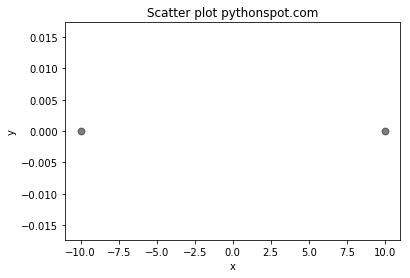

In [17]:
import matplotlib.pyplot as plt
N = 5
x = x
y = y
colors = (0,0,0)
area = np.pi*15
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()